<a href="https://colab.research.google.com/github/conpop9/Stonks-v2/blob/main/Apple_Stonks_A2C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [14]:

import gym
import gym_anytrading


from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Importing Data

In [15]:
df = pd.read_csv('apple.csv')

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,120.40,121.17,119.16,121.03,"88,105,047"
1,03/11/2021,122.54,123.21,121.26,121.96,"103,026,492"
2,03/10/2021,121.69,122.17,119.45,119.98,"111,943,297"
3,03/09/2021,119.03,122.06,118.79,121.09,"129,525,797"
4,03/08/2021,120.93,121.00,116.21,116.36,"154,376,609"


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [18]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,120.40,121.17,119.16,121.03,"88,105,047"
2021-03-11,122.54,123.21,121.26,121.96,"103,026,492"
2021-03-10,121.69,122.17,119.45,119.98,"111,943,297"
2021-03-09,119.03,122.06,118.79,121.09,"129,525,797"
2021-03-08,120.93,121.00,116.21,116.36,"154,376,609"


In [19]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [20]:
env.signal_features

array([[ 1.2103e+02,  0.0000e+00],
       [ 1.2196e+02,  9.3000e-01],
       [ 1.1998e+02, -1.9800e+00],
       [ 1.2109e+02,  1.1100e+00],
       [ 1.1636e+02, -4.7300e+00],
       [ 1.2142e+02,  5.0600e+00],
       [ 1.2013e+02, -1.2900e+00],
       [ 1.2206e+02,  1.9300e+00],
       [ 1.2512e+02,  3.0600e+00],
       [ 1.2779e+02,  2.6700e+00],
       [ 1.2126e+02, -6.5300e+00],
       [ 1.2099e+02, -2.7000e-01],
       [ 1.2535e+02,  4.3600e+00],
       [ 1.2586e+02,  5.1000e-01],
       [ 1.2600e+02,  1.4000e-01],
       [ 1.2987e+02,  3.8700e+00],
       [ 1.2971e+02, -1.6000e-01],
       [ 1.3084e+02,  1.1300e+00],
       [ 1.3319e+02,  2.3500e+00],
       [ 1.3537e+02,  2.1800e+00],
       [ 1.3513e+02, -2.4000e-01],
       [ 1.3539e+02,  2.6000e-01],
       [ 1.3601e+02,  6.2000e-01],
       [ 1.3691e+02,  9.0000e-01],
       [ 1.3676e+02, -1.5000e-01],
       [ 1.3739e+02,  6.3000e-01],
       [ 1.3394e+02, -3.4500e+00],
       [ 1.3499e+02,  1.0500e+00],
       [ 1.3414e+02,

#Environment

In [21]:
env.action_space

Discrete(2)

info {'total_reward': -30.860000000000014, 'total_profit': 0.3514626721740472, 'position': 1}


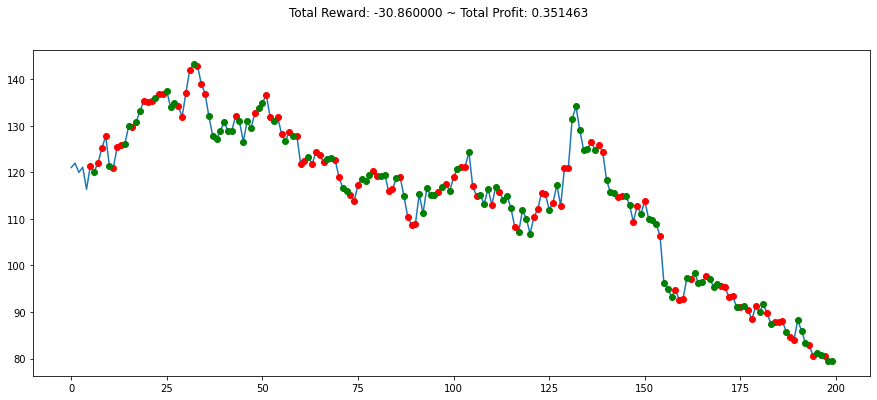

In [22]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

#Training

In [23]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

#Evaluation

In [29]:
env = gym.make('stocks-v0', df=df, frame_bound=(200,250), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.7864973604445566, 'position': 1}


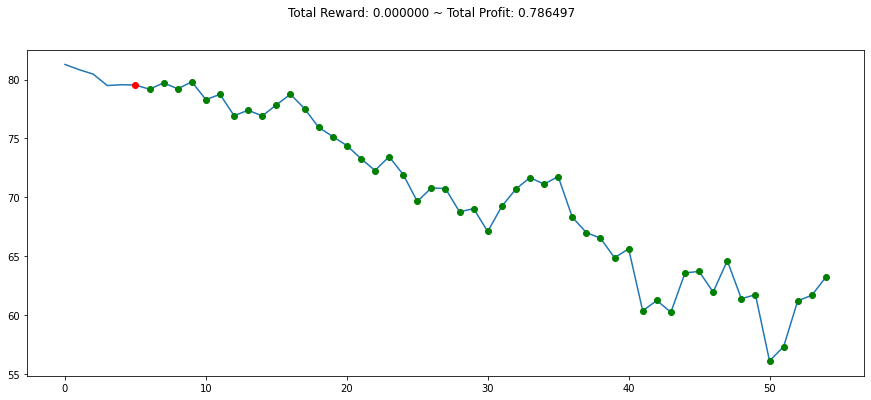

In [30]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()